In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
df = pd.read_csv("train.csv")


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## How many people survived?

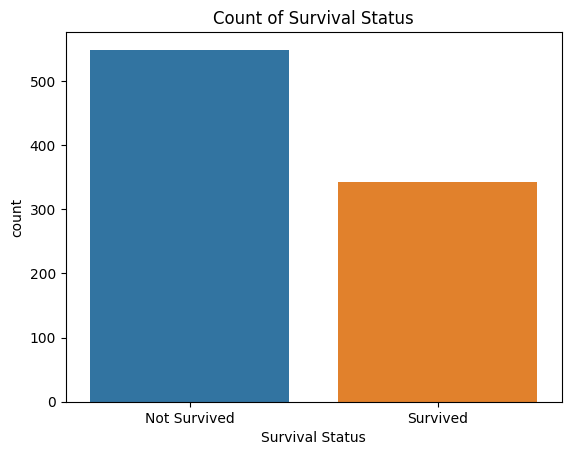

In [19]:
df['Survival Status'] = df['Survived'].apply(lambda x: 'Survived' if x == 1 else 'Not Survived')

sns.countplot(x='Survival Status', data=df, hue="Survival Status")
plt.title('Count of Survival Status')
plt.show()


Looking at the graph it is clear that the number of survived people is almost two times less than people who sank into Water

## what percentage of survived people is females?

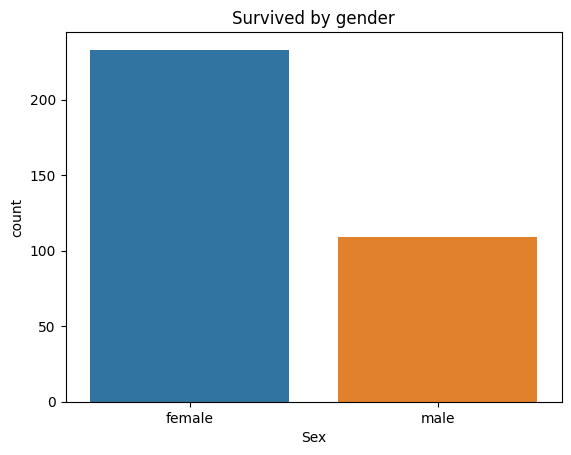

In [23]:
survided = df[df["Survived"]==1]
sns.countplot(x="Sex", data=survided, hue="Sex")
plt.title("Survived by gender")
plt.show()

The number of survived females are as twice much as males

## number of people per classes

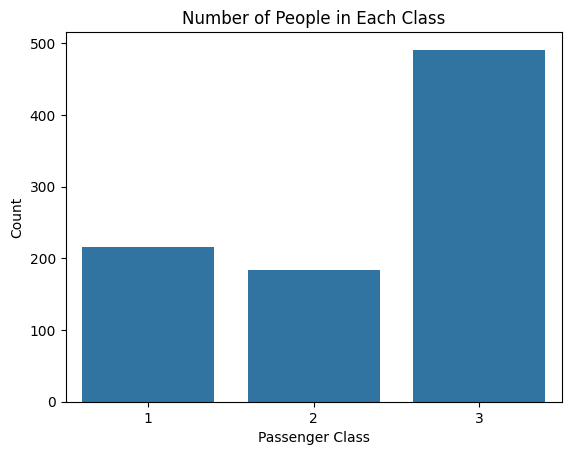

In [39]:
No_of_people_class = df['Pclass'].value_counts().sort_index()

sns.countplot(x='Pclass', data=df)
plt.title('Number of People in Each Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


Majority of passengers were in 3 class

Rate paid for each class

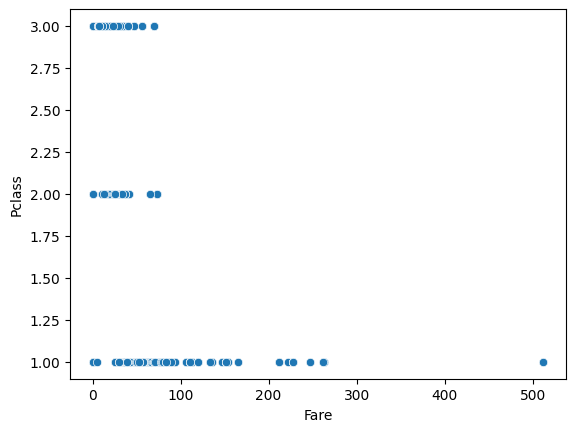

In [40]:
sns.scatterplot(x="Fare", y="Pclass", data = df)
plt.show()

People's ages in the titanic

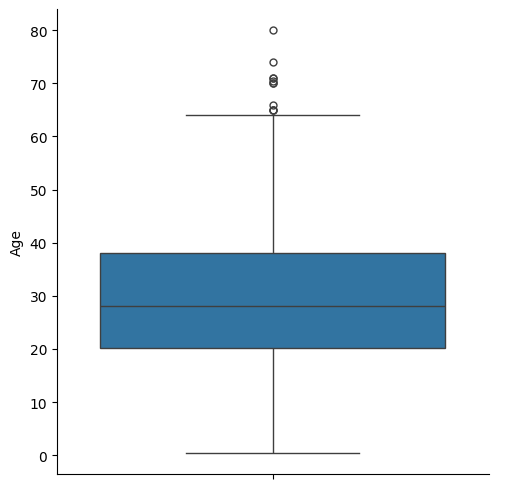

In [42]:
sns.catplot(y="Age", data=df, kind= "box")
plt.show()

In [46]:
data = df[df["Survived"]==1]
data = data.groupby(["Pclass"])["Survived"].count()


Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

how many people survived on each class

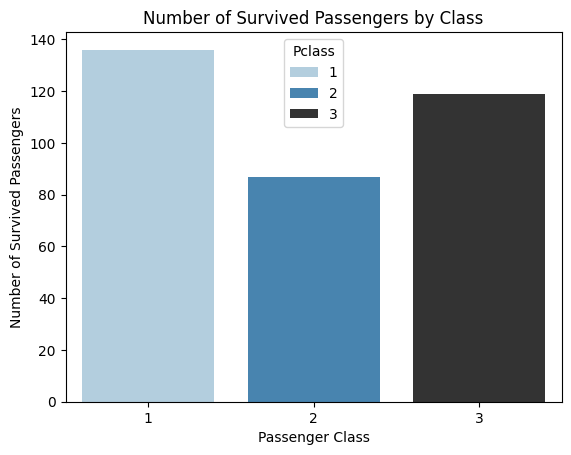

In [52]:
data = df[df["Survived"] == 1].groupby("Pclass")["Survived"].count().reset_index()

sns.barplot(x='Pclass', y='Survived', data=data, palette='Blues_d', hue='Pclass', dodge=False)
plt.title('Number of Survived Passengers by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Survived Passengers')
plt.xticks(rotation=0)  
plt.show()


As it is shown class 1 and 3 were way more safer than class 2

In [58]:
rate= df.groupby(["Pclass"])["Fare"].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

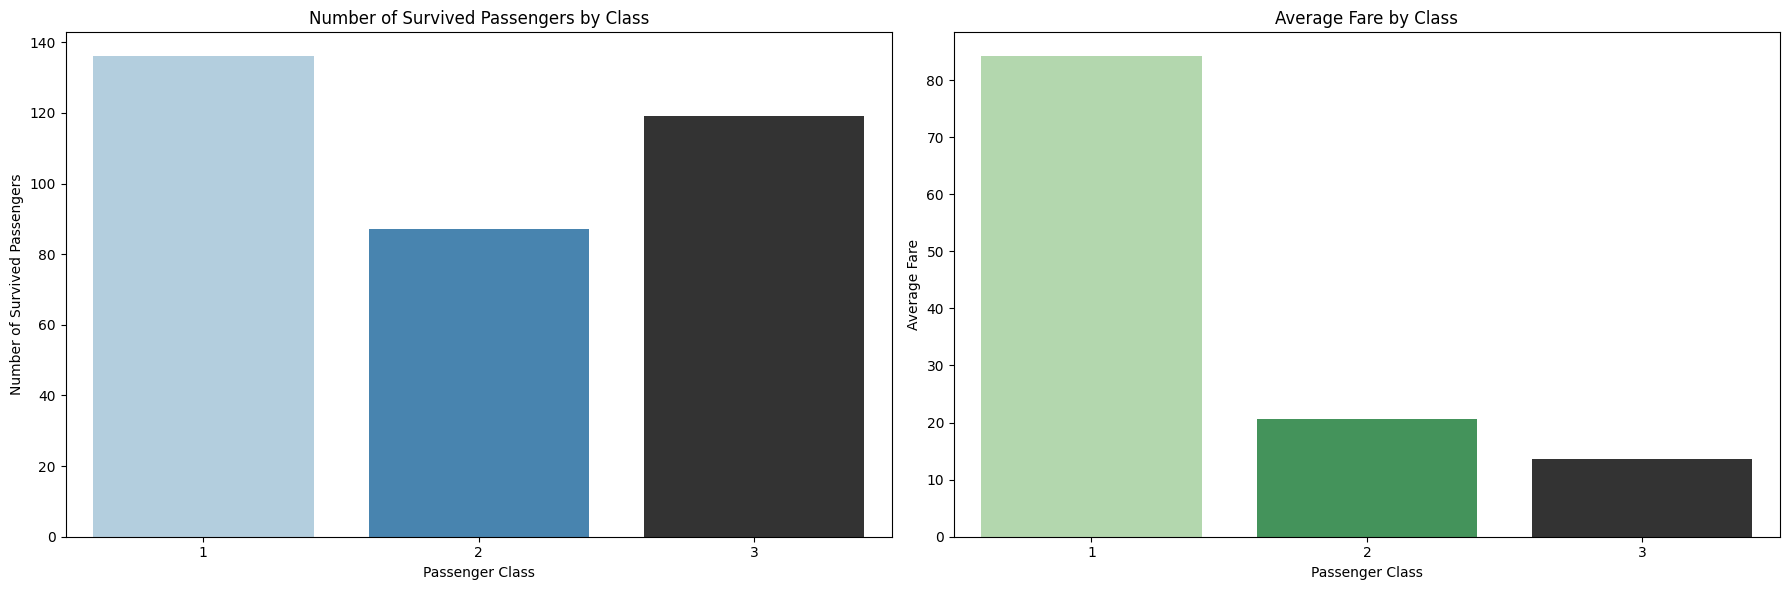

In [64]:
survivors_data = df[df["Survived"] == 1].groupby("Pclass")["Survived"].count().reset_index()
fare_data = df.groupby("Pclass")["Fare"].mean().reset_index()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.barplot(ax=axes[0], x='Pclass', y='Survived', data=survivors_data, hue='Pclass', dodge=False, palette='Blues_d')
axes[0].set_title('Number of Survived Passengers by Class')
axes[0].set_xlabel('Passenger Class')
axes[0].set_ylabel('Number of Survived Passengers')
axes[0].legend([], [], frameon=False)  

sns.barplot(ax=axes[1], x='Pclass', y='Fare', data=fare_data, hue='Pclass', dodge=False, palette='Greens_d')
axes[1].set_title('Average Fare by Class')
axes[1].set_xlabel('Passenger Class')
axes[1].set_ylabel('Average Fare')
axes[1].legend([], [], frameon=False)  

plt.tight_layout()
plt.show()


The given graph shows that the 1 class is the most expensice one moreover most safest

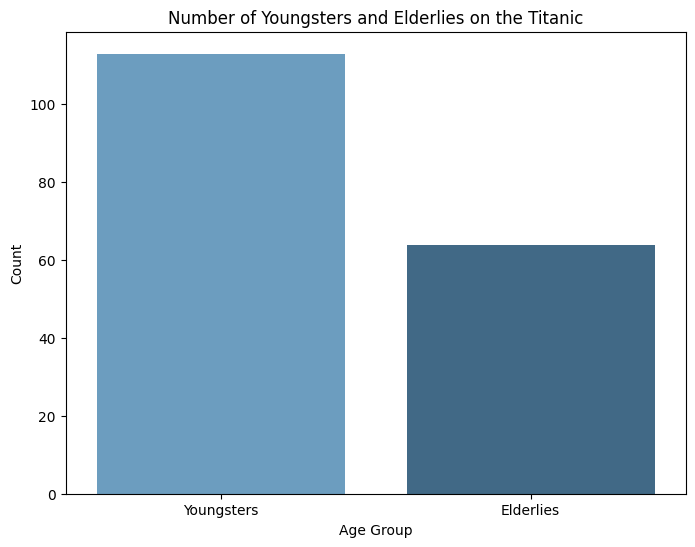

In [70]:
youngsters = df[df["Age"]<18]
elderlies = df[df["Age"]>50]
count_youngsters = youngsters.shape[0]
count_elderlies = elderlies.shape[0]

age_groups = pd.DataFrame({
    'Age Group': ['Youngsters', 'Elderlies'],
    'Count': [count_youngsters, count_elderlies]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Age Group', y='Count', data=age_groups, hue='Age Group', dodge=False, palette='Blues_d')
plt.title('Number of Youngsters and Elderlies on the Titanic')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend([], [], frameon=False) 
plt.show()



Youngsters are as twice much as elderlies